In [265]:
# Importing some basic libraries 

In [78]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [266]:
# Loading our dataset

In [79]:
df = pd.read_csv('temperature.csv')

In [80]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


So our dataset has total 7752 entries and 25 columns and most of the columns has null values. Out of 25 columns 1 column is object datatype and rest is numerical type

In [82]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

station
1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: count, dtype: int64


Date
30-06-2013    25
18-07-2016    25
25-07-2016    25
24-07-2016    25
23-07-2016    25
              ..
09-08-2014    25
08-08-2014    25
07-08-2014    25
06-08-2014    25
30-08-2017    25
Name: count, Length: 310, dtype: int64


Present_Tmax
31.4    112
29.4    111
29.1    108
29.7    107
31.9    105
       ... 
36.9      1
21.2      1
20.1      1
36.4      1
20.3      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.6      1
14.2      1
29.1      1
29.7      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
19.794666    2
71.658089    2
77.030350    2
98

In [267]:
# Converting Date column into datetime type and separating day,month and year 

In [83]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
#creating separate columns for day,month and year
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [84]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,30.0,8.0,2017.0
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,30.0,8.0,2017.0
7750,NaN,NaT,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


In [268]:
# As we have extracted day,month and year from the Date column. Now we can drop this date column

In [85]:
df.drop('Date',axis=1,inplace=True)

In [86]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
day                  2
month                2
year                 2
dtype: int64

In [270]:
# instead of Imputing the null values with the mean and mode, I am simply dropping the rows having atleast one null value. Because we have huge number of entries and it will give us better performance 

In [87]:
df.dropna(axis=0,inplace=True)

In [271]:
# checking for the null values

In [88]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
day                 0
month               0
year                0
dtype: int64

Now we dont have any null values 

In [89]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


After removing all the null values. Now we have 7588 rows and 27 columns. 2 columns has increased because of the Date column

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Present_Tmax      7588 non-null   float64
 2   Present_Tmin      7588 non-null   float64
 3   LDAPS_RHmin       7588 non-null   float64
 4   LDAPS_RHmax       7588 non-null   float64
 5   LDAPS_Tmax_lapse  7588 non-null   float64
 6   LDAPS_Tmin_lapse  7588 non-null   float64
 7   LDAPS_WS          7588 non-null   float64
 8   LDAPS_LH          7588 non-null   float64
 9   LDAPS_CC1         7588 non-null   float64
 10  LDAPS_CC2         7588 non-null   float64
 11  LDAPS_CC3         7588 non-null   float64
 12  LDAPS_CC4         7588 non-null   float64
 13  LDAPS_PPT1        7588 non-null   float64
 14  LDAPS_PPT2        7588 non-null   float64
 15  LDAPS_PPT3        7588 non-null   float64
 16  LDAPS_PPT4        7588 non-null   float64
 17  

In [91]:
# checking for duplicate columns. if present the drop this column
df1=df.T.drop_duplicates().T
print(df1)

      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233

In [92]:
df=df1

In [93]:
# Dropping all the duplicate rows
df.drop_duplicates(inplace=True)

In [94]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


In [95]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,0.368510,...,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820,15.939510,7.465999,2014.991697
std,7.217858,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,0.262260,...,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256,8.906521,0.528635,1.410877
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,6.000000,2013.000000
25%,7.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,0.146546,...,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000,8.000000,7.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,0.315706,...,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000,16.000000,7.000000,2015.000000
75%,19.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,0.574174,...,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000,24.000000,8.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000,31.000000,8.000000,2017.000000


By analysing the statistical summary of our dataset we can see LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 these columns has very high positive skewness.
and also too much outliers are present in these columns, because there is a huge difference between the 75th percentile and the max value

In [272]:
# Checking the skewness 

In [96]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
day                -0.010718
month              -0.174856
year                0.013575
dtype: float64

As I say LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 these columns has very high positive skewness 

In [273]:
# Separating the columns having skewness of greater than 0.5 and less than -0.5 

In [97]:
skewed_col=[]
normal_col=[]
for i in df.columns:
    if (df[i].skew() >0.5) or (df[i].skew() <-0.5) :
        skewed_col.append(i)
    else:
        normal_col.append(i)

print('skewed_cols are :',skewed_col)
print('\n')
print("Normal cols are :",normal_col)
        

skewed_cols are : ['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation']


Normal cols are : ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmax_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'lat', 'lon', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year']


In [274]:
# Removing the skewness by using cube root method

In [98]:
for i in skewed_col:
    df[i] = np.cbrt(df[i])

In [99]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.813885
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3          -0.559701
LDAPS_CC4          -0.458425
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 0.919265
Slope               0.612855
Solar radiation    -0.588081
Next_Tmax          -0.334842
Next_Tmin          -0.393662
day                -0.010718
month              -0.174856
year                0.013575
dtype: float64

Now we can see that skewness is almost removed

In [275]:
# plotting dist plot to check the distribution of the columns 

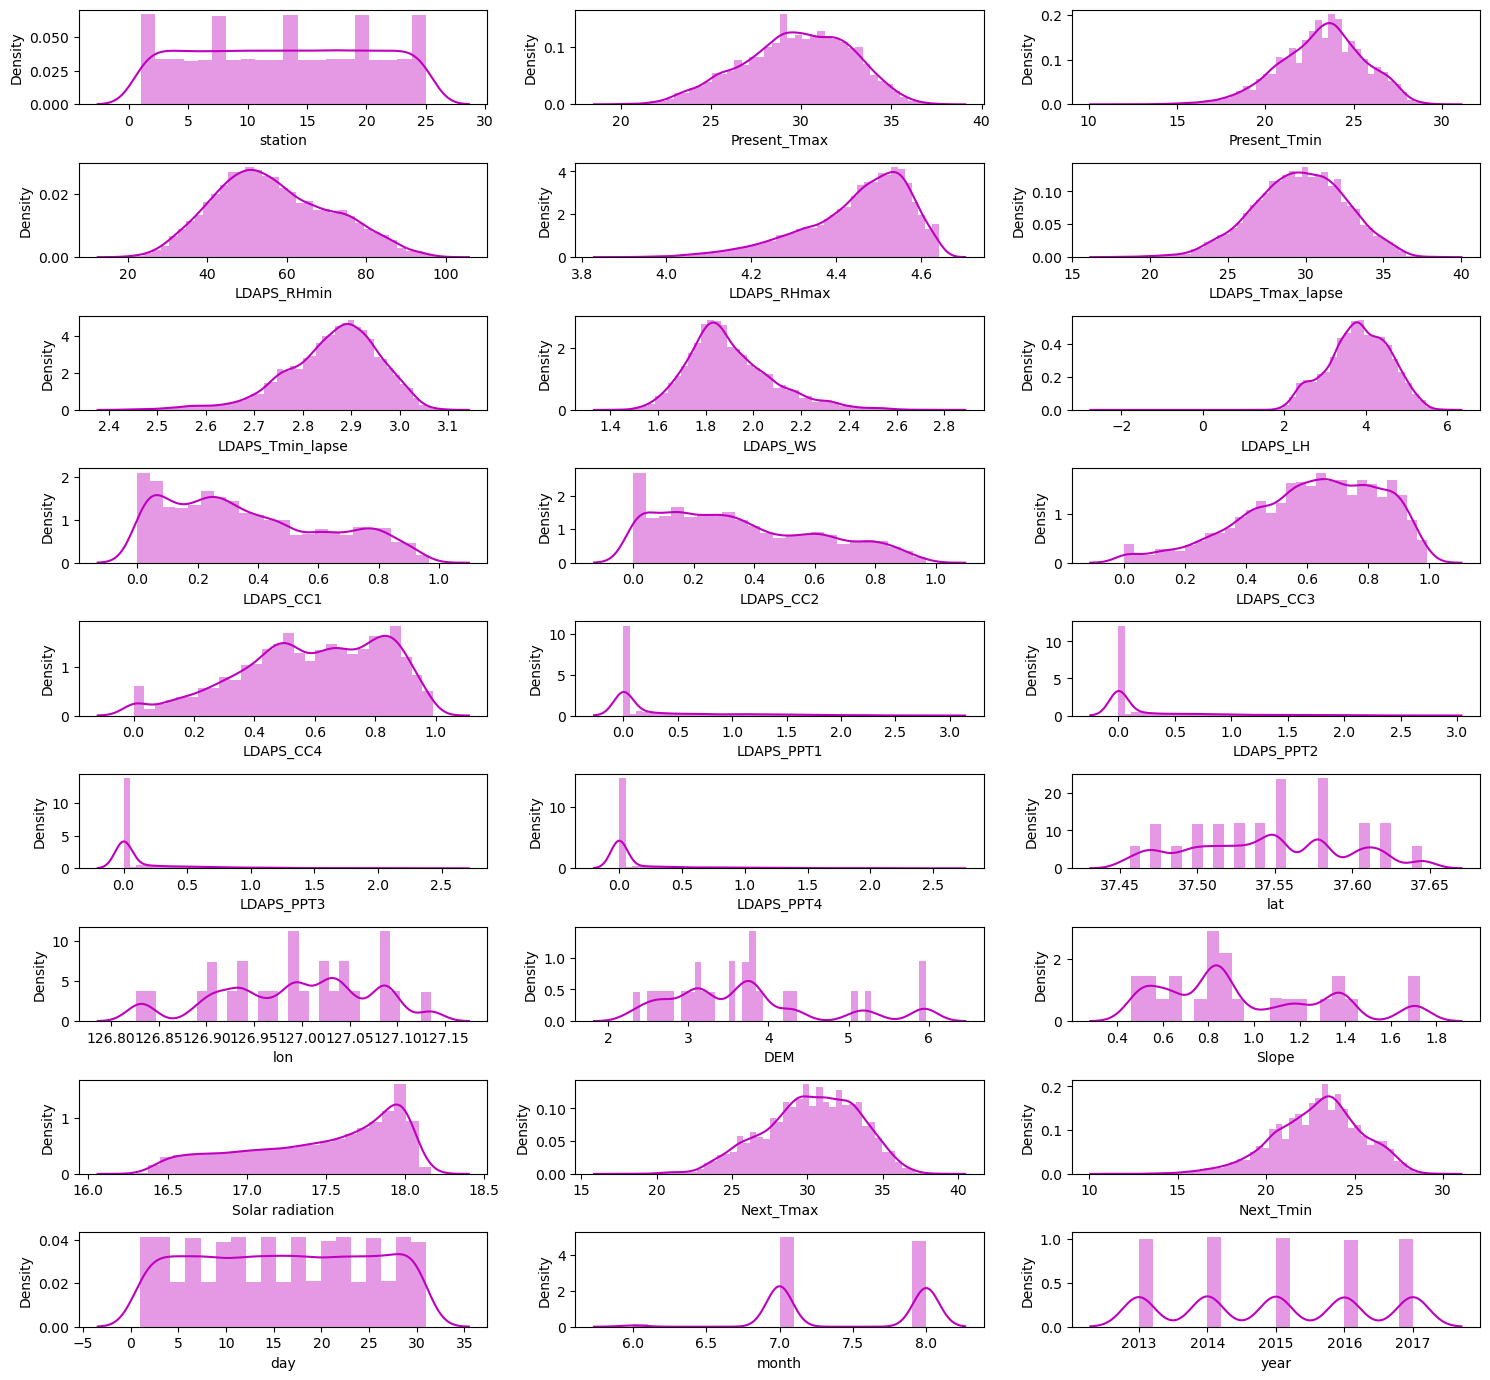

In [100]:
plt.figure(figsize=(15,15),facecolor='white')
p=1
for i in df.columns:
    if p<=28:
        ax=plt.subplot(10,3,p)
        sns.distplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM'] these cols has still skewness present but very less as compared before

In [276]:
# Plotting boxplot to check the range and outliers present in the columns

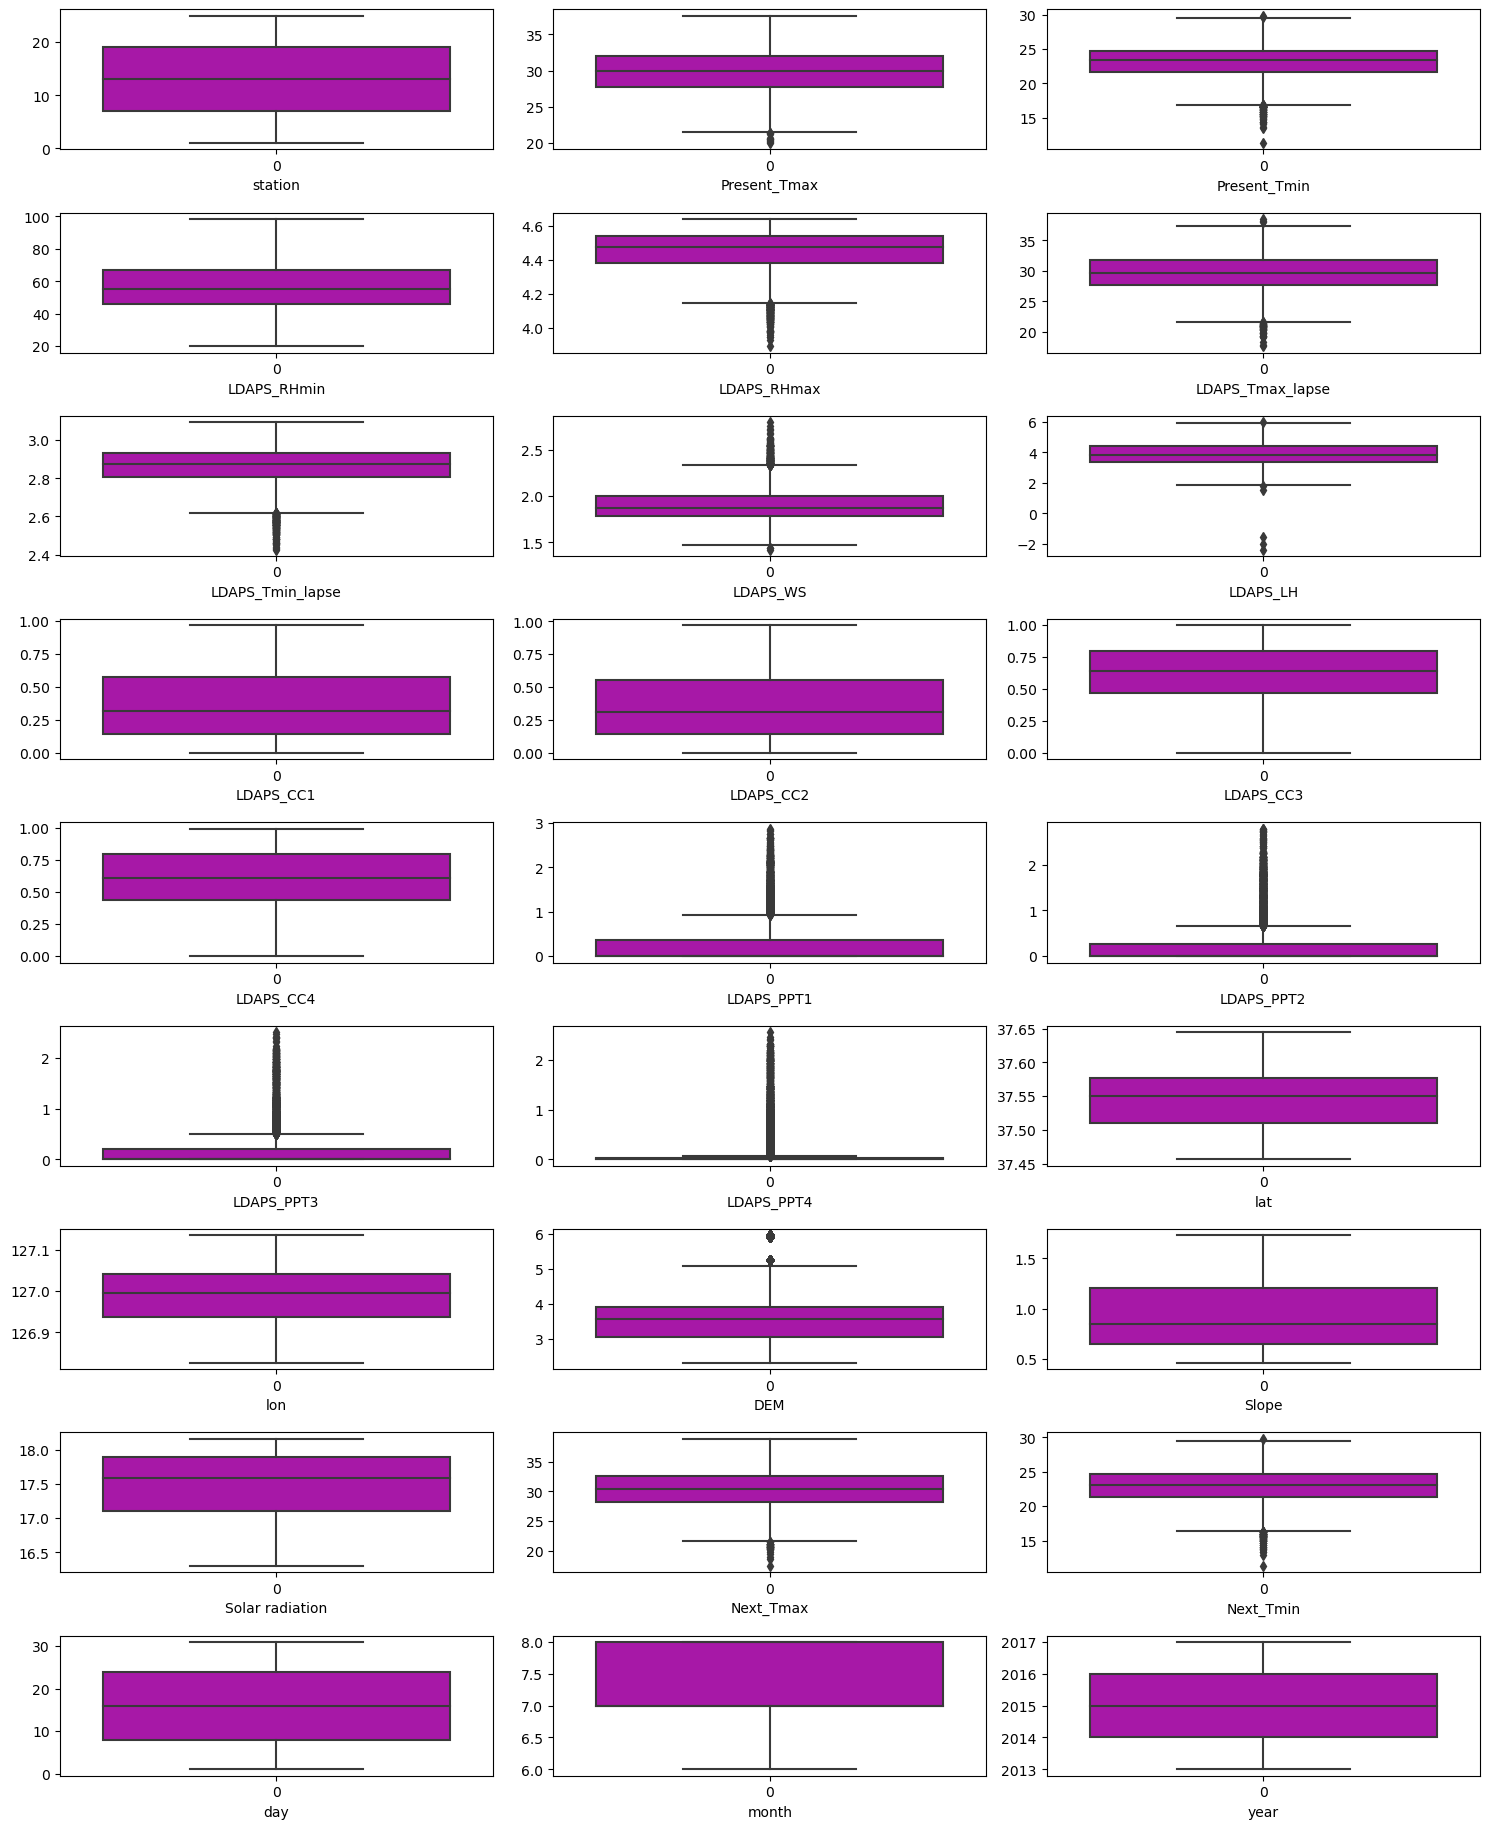

In [103]:
plt.figure(figsize=(15,20),facecolor='white')
p=1
for i in df.columns:
    if p<=28:
        ax=plt.subplot(10,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

['LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'] these cols has too much outliers present

In [108]:
# Lets remove the outliers 
from scipy.stats import zscore


In [109]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

In [110]:
a=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax','day', 'month', 'year']

In [111]:
curr=df[a]

In [277]:
# I am using zscore method to remove the outliers

In [112]:
z=np.abs(zscore(curr))
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582], dtype=int64), array([ 7, 14, 14, ...,  2,  2,  6], dtype=int64))


In [113]:
df_new = df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,4.499858,28.074101,2.844153,1.896289,4.110499,0.233947,...,37.6046,126.991,5.965871,1.406938,18.164032,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,4.491419,29.850689,2.885901,1.785468,3.731014,0.225508,...,37.6046,127.032,3.550622,0.801092,18.038306,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,4.379060,30.091292,2.906984,1.830969,2.740099,0.209344,...,37.5776,127.058,3.217444,0.643203,18.032406,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,4.586534,29.704629,2.857247,1.781083,4.035663,0.216372,...,37.6450,127.022,3.575659,1.363477,18.025647,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,4.483978,29.113934,2.863778,1.789965,4.761697,0.151407,...,37.5507,127.135,3.272250,0.796600,18.028301,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.277426,27.812697,2.635366,1.876086,2.126355,0.052902,...,37.5507,127.040,2.973771,0.830151,16.455681,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,4.374125,26.704905,2.611685,1.793400,4.347071,0.066461,...,37.5102,127.086,2.800629,0.510703,16.438157,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,4.288483,26.352081,2.657859,1.832031,4.161290,0.030034,...,37.5372,126.891,2.498004,0.537630,16.440020,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,4.259746,27.010193,2.655868,1.870345,3.614996,0.035874,...,37.5237,126.909,2.586099,0.605778,16.433924,28.6,18.8,30.0,8.0,2017.0


In [114]:
df=df_new

In [115]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,1.0,28.7,21.4,58.255688,4.499858,28.074101,2.844153,1.896289,4.110499,0.233947,...,37.6046,126.991,5.965871,1.406938,18.164032,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,4.491419,29.850689,2.885901,1.785468,3.731014,0.225508,...,37.6046,127.032,3.550622,0.801092,18.038306,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,4.379060,30.091292,2.906984,1.830969,2.740099,0.209344,...,37.5776,127.058,3.217444,0.643203,18.032406,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,4.586534,29.704629,2.857247,1.781083,4.035663,0.216372,...,37.6450,127.022,3.575659,1.363477,18.025647,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,4.483978,29.113934,2.863778,1.789965,4.761697,0.151407,...,37.5507,127.135,3.272250,0.796600,18.028301,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.277426,27.812697,2.635366,1.876086,2.126355,0.052902,...,37.5507,127.040,2.973771,0.830151,16.455681,27.6,17.7,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,4.374125,26.704905,2.611685,1.793400,4.347071,0.066461,...,37.5102,127.086,2.800629,0.510703,16.438157,28.0,17.1,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,4.288483,26.352081,2.657859,1.832031,4.161290,0.030034,...,37.5372,126.891,2.498004,0.537630,16.440020,28.3,18.1,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,4.259746,27.010193,2.655868,1.870345,3.614996,0.035874,...,37.5237,126.909,2.586099,0.605778,16.433924,28.6,18.8,30.0,8.0,2017.0


In [278]:
# Plotting boxplot again to check the outliers 

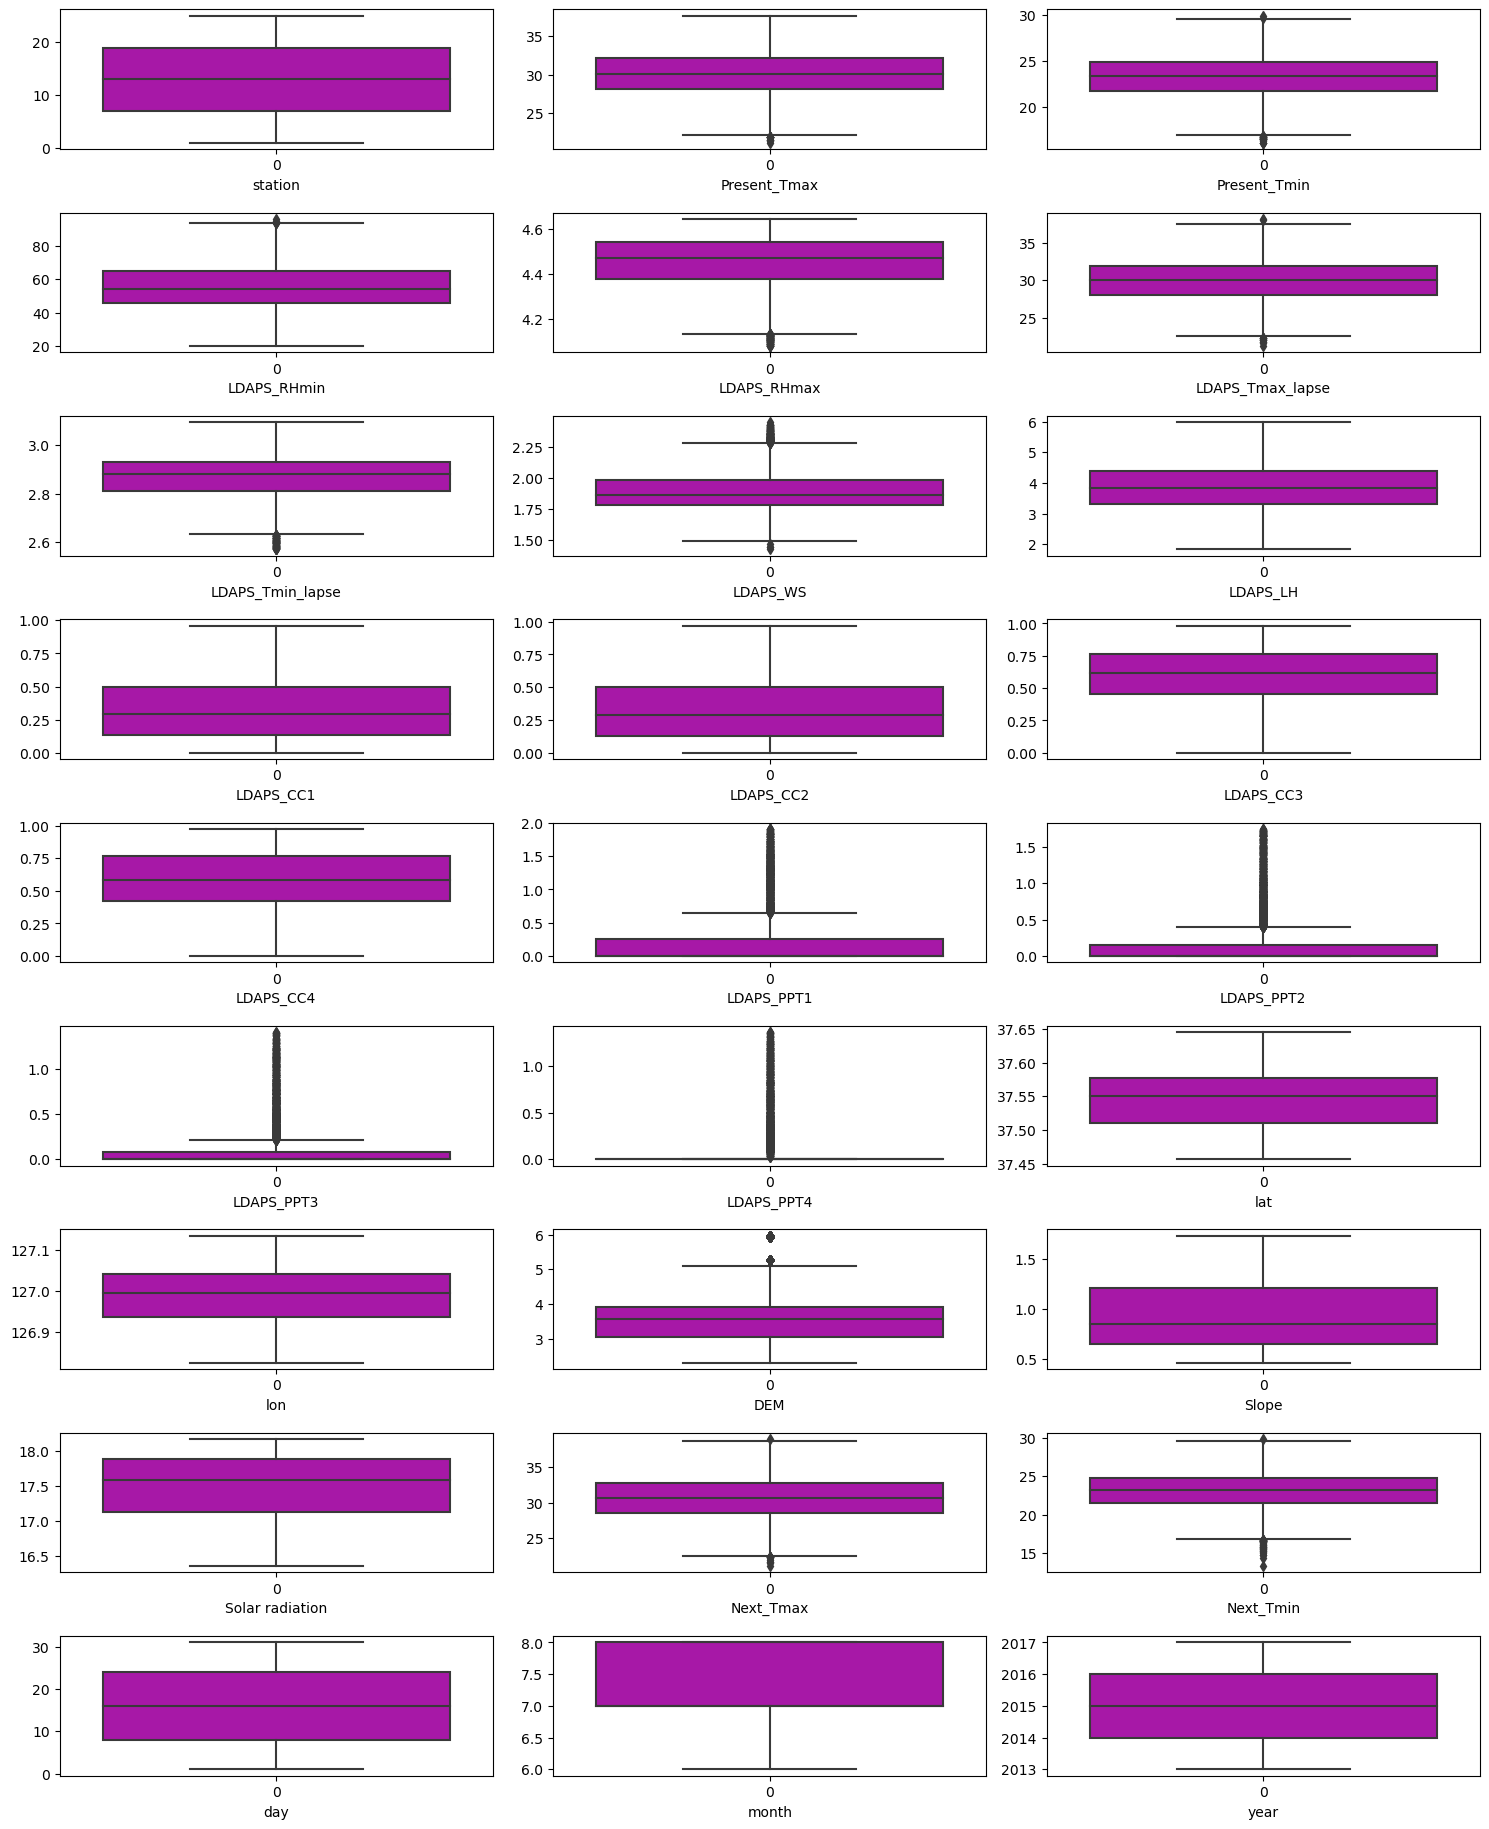

In [116]:
plt.figure(figsize=(15,20),facecolor='white')
p=1
for i in df.columns:
    if p<=28:
        ax=plt.subplot(10,3,p)
        sns.boxplot(df[i],color='m')
        plt.xlabel(i)
    p+=1
plt.tight_layout()

Still outliers present but reduced than before 

In [279]:
# Plotting the scatter plot to ckeck relationship between two columns

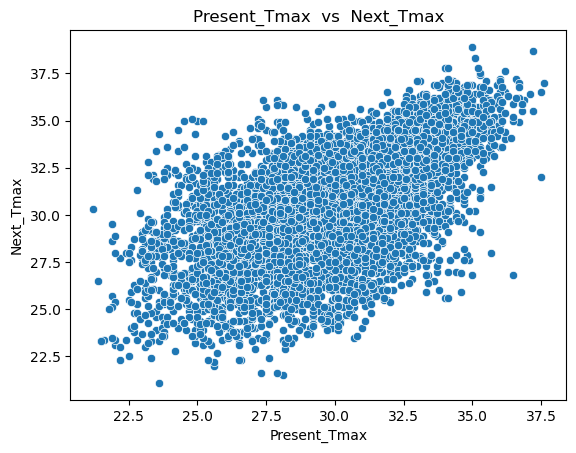

In [118]:
plt.title('Present_Tmax  vs  Next_Tmax')
sns.scatterplot(x='Present_Tmax',y='Next_Tmax',data= df,palette= "bright" )
plt.show()

In [117]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'day', 'month', 'year'],
      dtype='object')

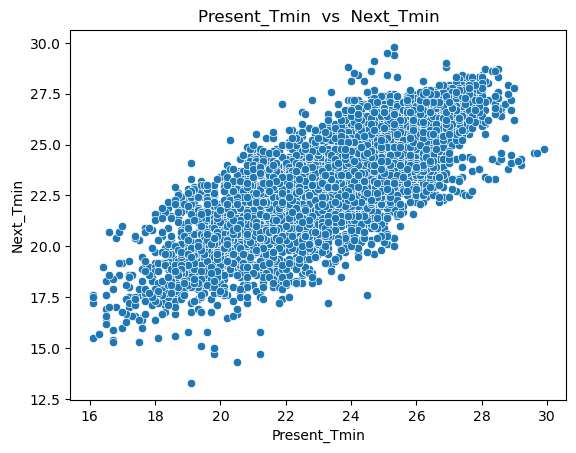

In [121]:
plt.title('Present_Tmin  vs  Next_Tmin')
sns.scatterplot(x='Present_Tmin',y='Next_Tmin',data= df,palette= "bright" )
plt.show()

Present_Tmin and  Next_Tmin has also postive relationship

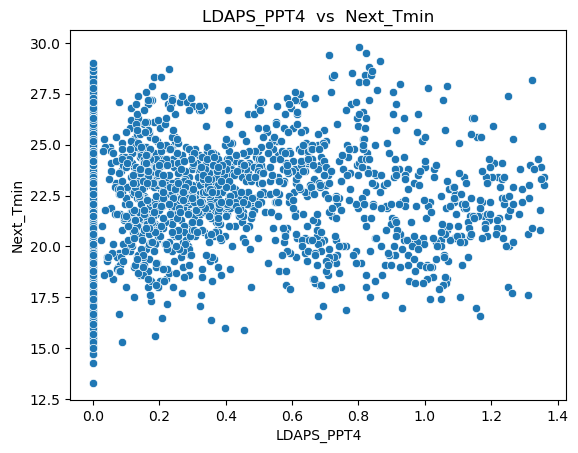

In [123]:
plt.title('LDAPS_PPT4  vs  Next_Tmin')
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmin',data= df,palette= "bright" )
plt.show()

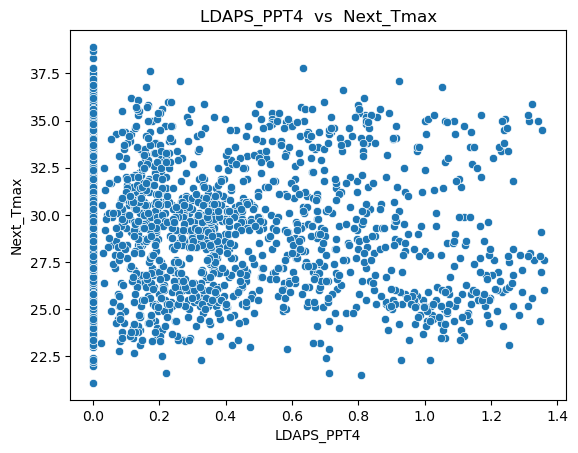

In [124]:
plt.title('LDAPS_PPT4  vs  Next_Tmax')
sns.scatterplot(x='LDAPS_PPT4',y='Next_Tmax',data= df,palette= "bright" )
plt.show()

these col has neutral relationship

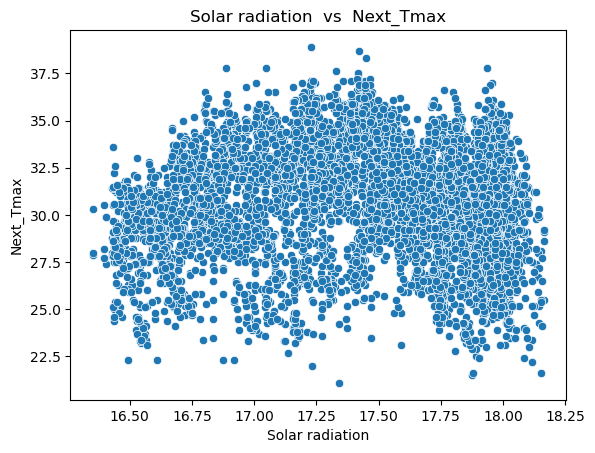

In [125]:
plt.title('Solar radiation  vs  Next_Tmax')
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data= df,palette= "bright" )
plt.show()

these col has neutral relationship

In [280]:
# plotting countplot 

station
23.0    279
18.0    275
9.0     272
7.0     271
16.0    271
8.0     271
19.0    271
11.0    270
22.0    270
24.0    268
4.0     267
15.0    267
10.0    266
2.0     266
14.0    266
13.0    266
6.0     265
25.0    264
12.0    264
21.0    263
5.0     263
17.0    260
3.0     259
1.0     259
20.0    251
Name: count, dtype: int64

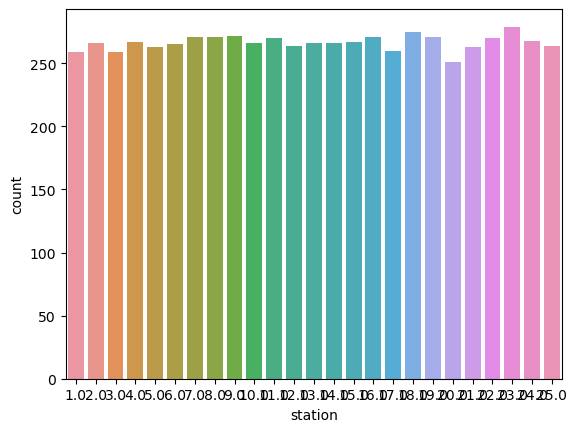

In [126]:
ax = sns.countplot(x='station',data = df)
df['station'].value_counts()

In [281]:
# checking correlation 

In [127]:
corr = df.corr()

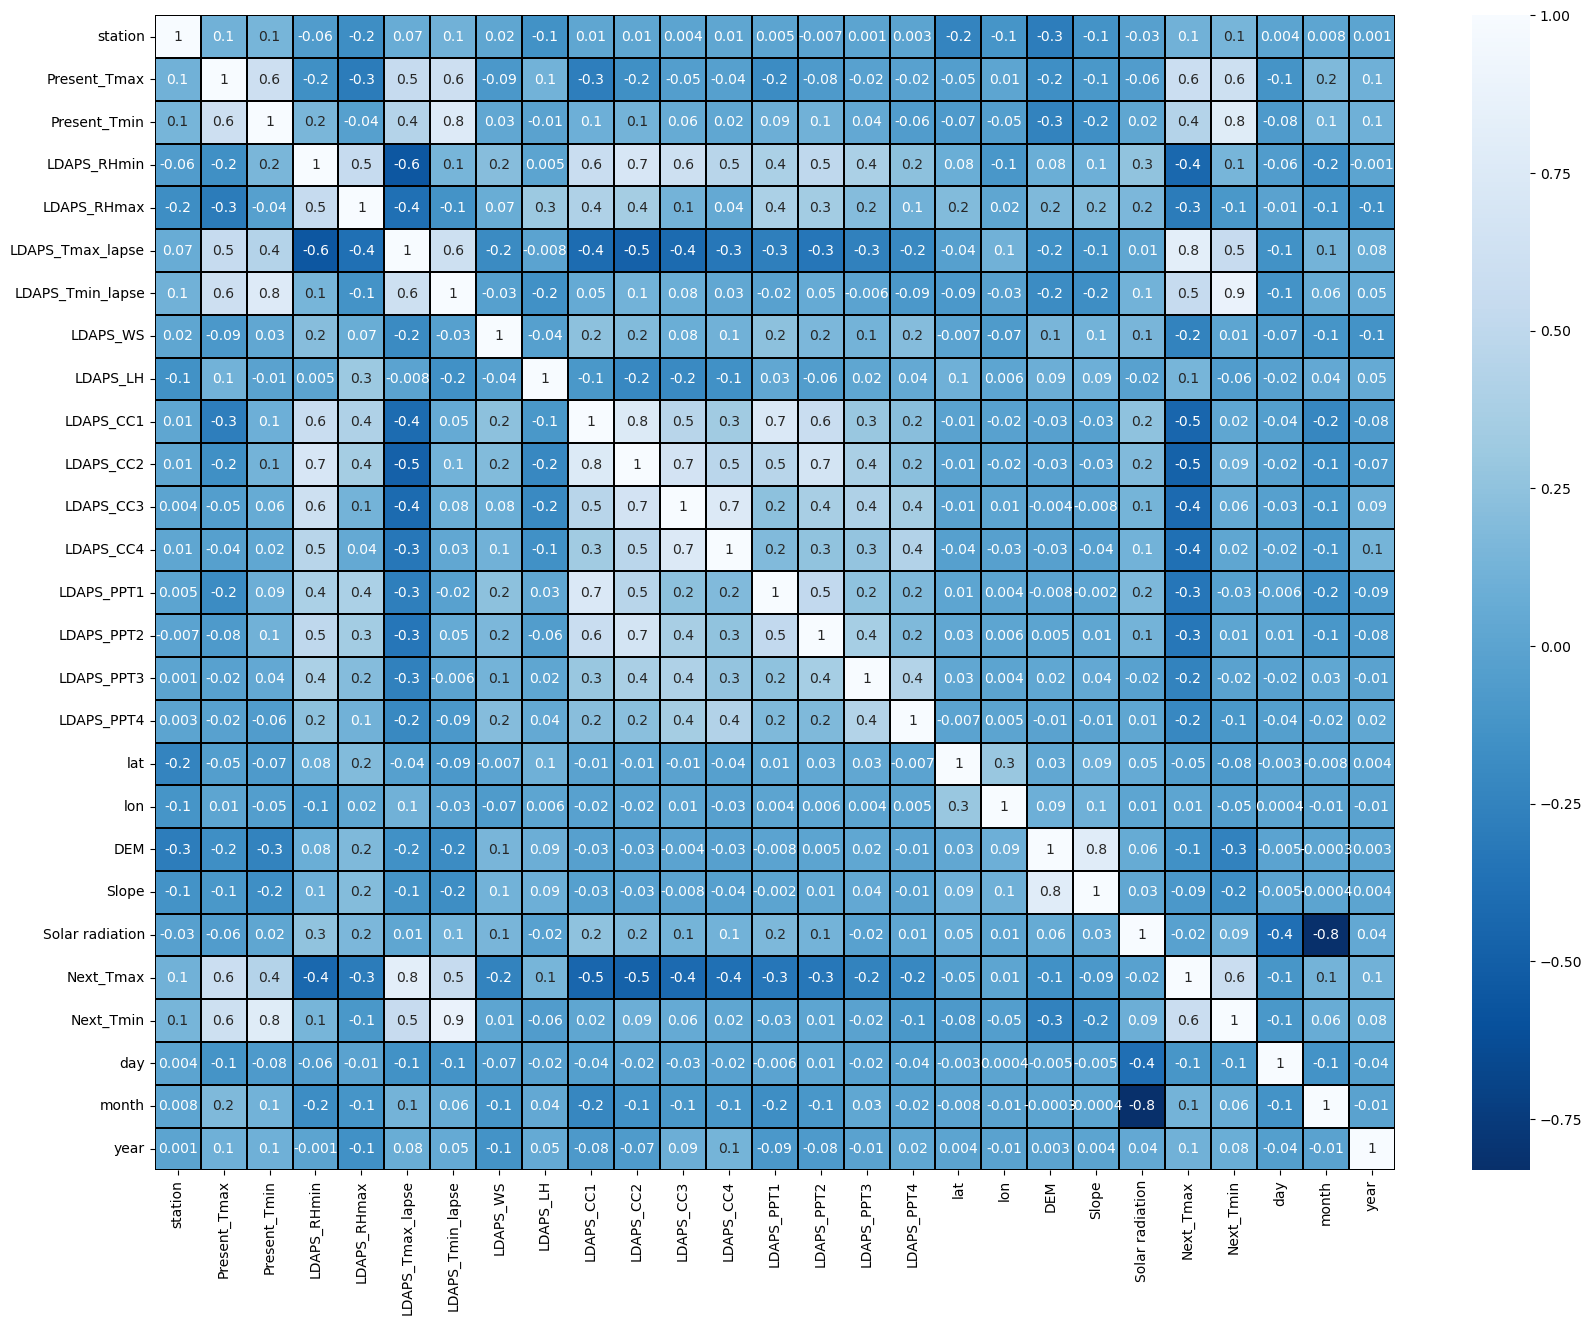

In [128]:
# visualization of correlation by heatmap 
plt.figure(figsize=(20,15))
sns.heatmap(corr,linewidths = .1,fmt='.1g',linecolor = 'black',annot = True,cmap = 'Blues_r')
plt.yticks(rotation =0)
plt.show()

Next_Tmax col has high correlation with all the columns 

and Next_Tmin col has significantly less correlation with all columns than Next_Tmax  

In [130]:
corr['Next_Tmax'].sort_values(ascending=False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.814838
Present_Tmax        0.585195
Next_Tmin           0.576714
LDAPS_Tmin_lapse    0.537185
Present_Tmin        0.436767
LDAPS_LH            0.138508
month               0.122564
year                0.112646
station             0.108854
lon                 0.011345
Solar radiation    -0.021563
lat                -0.046188
Slope              -0.093367
day                -0.109867
DEM                -0.146699
LDAPS_PPT4         -0.214420
LDAPS_PPT3         -0.245373
LDAPS_WS           -0.249357
LDAPS_RHmax        -0.300136
LDAPS_PPT2         -0.326675
LDAPS_PPT1         -0.333745
LDAPS_CC4          -0.377140
LDAPS_CC3          -0.419271
LDAPS_RHmin        -0.434733
LDAPS_CC1          -0.450758
LDAPS_CC2          -0.481038
Name: Next_Tmax, dtype: float64

So here we can see that Next_Tmax col has good correlation with the most of the cols

In [131]:
corr['Next_Tmin'].sort_values(ascending=False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.872174
Present_Tmin        0.783114
Present_Tmax        0.607214
Next_Tmax           0.576714
LDAPS_Tmax_lapse    0.548209
LDAPS_RHmin         0.138756
station             0.135249
LDAPS_CC2           0.085738
Solar radiation     0.085063
year                0.077537
month               0.063750
LDAPS_CC3           0.055426
LDAPS_CC4           0.017259
LDAPS_CC1           0.015774
LDAPS_PPT2          0.011482
LDAPS_WS            0.010420
LDAPS_PPT3         -0.015070
LDAPS_PPT1         -0.034564
lon                -0.048137
LDAPS_LH           -0.061191
lat                -0.080928
LDAPS_RHmax        -0.095454
LDAPS_PPT4         -0.097067
day                -0.098024
Slope              -0.166288
DEM                -0.254739
Name: Next_Tmin, dtype: float64

As compared to Next_Tmax col Next_Tmin col has not that much correlation with the other column

In [282]:
# Separating x and y 

In [133]:
x=df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df[['Next_Tmax', 'Next_Tmin']]

In [134]:
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,day,month,year
0,1.0,28.7,21.4,58.255688,4.499858,28.074101,2.844153,1.896289,4.110499,0.233947,...,0.0,0.0,37.6046,126.991,5.965871,1.406938,18.164032,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,4.491419,29.850689,2.885901,1.785468,3.731014,0.225508,...,0.0,0.0,37.6046,127.032,3.550622,0.801092,18.038306,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,4.379060,30.091292,2.906984,1.830969,2.740099,0.209344,...,0.0,0.0,37.5776,127.058,3.217444,0.643203,18.032406,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,4.586534,29.704629,2.857247,1.781083,4.035663,0.216372,...,0.0,0.0,37.6450,127.022,3.575659,1.363477,18.025647,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,4.483978,29.113934,2.863778,1.789965,4.761697,0.151407,...,0.0,0.0,37.5507,127.135,3.272250,0.796600,18.028301,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,4.277426,27.812697,2.635366,1.876086,2.126355,0.052902,...,0.0,0.0,37.5507,127.040,2.973771,0.830151,16.455681,30.0,8.0,2017.0
7746,22.0,22.5,17.4,30.094858,4.374125,26.704905,2.611685,1.793400,4.347071,0.066461,...,0.0,0.0,37.5102,127.086,2.800629,0.510703,16.438157,30.0,8.0,2017.0
7747,23.0,23.3,17.1,26.741310,4.288483,26.352081,2.657859,1.832031,4.161290,0.030034,...,0.0,0.0,37.5372,126.891,2.498004,0.537630,16.440020,30.0,8.0,2017.0
7748,24.0,23.3,17.7,24.040634,4.259746,27.010193,2.655868,1.870345,3.614996,0.035874,...,0.0,0.0,37.5237,126.909,2.586099,0.605778,16.433924,30.0,8.0,2017.0


In [135]:
y

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5
...,...,...
7745,27.6,17.7
7746,28.0,17.1
7747,28.3,18.1
7748,28.6,18.8


In [138]:
# Standard Scaling
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x=pd.DataFrame(st.fit_transform(x),columns=x.columns)
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,day,month,year
0,-1.670979,-0.433585,-0.822638,0.208820,0.450259,-0.680780,-0.264553,0.060991,0.376432,-0.432100,...,-0.45956,-0.399753,1.202436,0.003904,2.348223,1.283310,1.488686,1.595997,-2.798407,-1.415408
1,-1.532068,0.686476,-0.735625,-0.227516,0.379211,-0.028756,0.195189,-0.615061,-0.121949,-0.465805,...,-0.45956,-0.399753,1.202436,0.518489,-0.140127,-0.418266,1.217573,1.595997,-2.798407,-1.415408
2,-1.393157,0.581471,0.003982,-0.487682,-0.566814,0.059548,0.427361,-0.337490,-1.423326,-0.530364,...,-0.45956,-0.399753,0.665138,0.844810,-0.483389,-0.861712,1.204851,1.595997,-2.798407,-1.415408
3,-1.254246,0.721478,0.047489,0.207662,1.180042,-0.082361,-0.120351,-0.641815,0.278150,-0.502294,...,-0.45956,-0.399753,2.006392,0.392980,-0.114332,1.161246,1.190277,1.595997,-2.798407,-1.415408
4,-1.115334,0.511467,-0.605106,0.057246,0.316557,-0.299151,-0.048438,-0.587628,1.231656,-0.761755,...,-0.45956,-0.399753,0.129831,1.811225,-0.426925,-0.430883,1.196000,1.595997,-2.798407,-1.415408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6659,1.107246,-2.393691,-2.388867,-2.235379,-1.422535,-0.776717,-2.563772,-0.062257,-2.229360,-1.155167,...,-0.45956,-0.399753,0.129831,0.618895,-0.734437,-0.336651,-2.195173,1.595997,1.005098,1.453072
6660,1.246158,-2.603703,-2.562892,-1.841745,-0.608363,-1.183287,-2.824549,-0.566674,0.687124,-1.101015,...,-0.45956,-0.399753,-0.676115,1.196234,-0.912819,-1.233853,-2.232961,1.595997,1.005098,1.453072
6661,1.385069,-2.323687,-2.693411,-2.085938,-1.329440,-1.312777,-2.316073,-0.331007,0.443137,-1.246499,...,-0.45956,-0.399753,-0.138818,-1.251180,-1.224604,-1.158225,-2.228944,1.595997,1.005098,1.453072
6662,1.523980,-2.323687,-2.432373,-2.282591,-1.571390,-1.071244,-2.337997,-0.097280,-0.274317,-1.223176,...,-0.45956,-0.399753,-0.407467,-1.025265,-1.133842,-0.966826,-2.242088,1.595997,1.005098,1.453072


In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# checking the VIF 
ds=pd.DataFrame()
ds['Columns']=x.columns
ds['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
ds

,Columns,vif
0,station,1.247376
1,Present_Tmax,2.755235
2,Present_Tmin,3.206820
3,LDAPS_RHmin,5.978196
4,LDAPS_RHmax,2.273659
5,LDAPS_Tmax_lapse,6.980431
6,LDAPS_Tmin_lapse,6.945600
7,LDAPS_WS,1.258513
8,LDAPS_LH,1.500255
9,LDAPS_CC1,4.816178


Solar radiation and month col has high vif values. so we can drop these columns 

In [283]:
# Importing some metrices 

In [140]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [284]:
# checking for the best random_state value

In [141]:
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    RFR=RandomForestRegressor(n_jobs=-1)
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i

print('max accuracy is :',maxacc,'random state :',maxrs)  

max accuracy is : 0.9022289456247867 random state : 68


In [285]:
# splitting our dataset based on the best random_state value 

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxrs)

In [286]:
# lets make a copy for the train and test. so that it will not mixed up with the others

In [157]:
x_train1,x_test1,y_train1,y_test1=x_train.copy(),x_test.copy(),y_train.copy(),y_test.copy()

In [287]:
# Importing cross_val_score and RandomForestRegressor for our base model

In [158]:
from sklearn.model_selection import cross_val_score

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [288]:
# Lets do some feature selection process. Because we have now 27 columns. so it may lead to overfitting 

In [289]:
# Importing SequentialFeatureSelector for the selection process

In [160]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [290]:
# applying forward selection method

In [163]:
RFR = RandomForestRegressor(n_jobs=-1)
sfs = SFS(RFR, k_features='best', forward=True, floating=False, scoring='r2',cv=5,n_jobs=-1)

sfs.fit(x_train1, y_train1)

SequentialFeatureSelector(estimator=RandomForestRegressor(n_jobs=-1),
                          k_features=(1, 25), n_jobs=-1, scoring='r2')

In [292]:
# These are the best columns index number obtained by the method

In [164]:
sfs.k_feature_idx_

(0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 17, 18, 19, 21, 22, 23, 24)

In [293]:
# Checking for the names of the columns

In [165]:
selected_columns = sfs.k_feature_names_
print("Selected features: ",selected_columns)

Selected features:  ('station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'lat', 'lon', 'DEM', 'Solar radiation', 'day', 'month', 'year')


Now we have total 17 columns in train dataset

In [294]:
# Transforming the train and test dataset for the new best columns
# And checking performance of the model

In [167]:
x_train_2 = sfs.transform(x_train1)
x_test_2 = sfs.transform(x_test1)

model = RandomForestRegressor()

print("training",np.mean(cross_val_score(model, x_train_2, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_2, y_test, cv=5, scoring='r2')))

training 0.8848978874138872
testing 0.8313534803943348


for the base model of RandomForestRegressor we achived r2_score 88% and 83% for the train and test dataset 

In [295]:
# Appling PCA for further reduction of dimension

In [179]:
#from sklearn.decomposition import PCA
#pca = PCA(n_components=17)
#x_train_3 = pca.fit_transform(x_train_2)
#x_test_3 = pca.transform(x_test_2)


In [180]:
#variance = pca.explained_variance_ratio_
#print(variance)


[0.2297861  0.16790789 0.10635918 0.0868055  0.06752315 0.06310073
 0.05793441 0.04895635 0.04423409 0.0368782  0.02606392 0.02106138
 0.01624244 0.0117725  0.00970347 0.00471945 0.00095126]


In [181]:
#print("training",np.mean(cross_val_score(model, x_train_3, y_train, cv=5, scoring='r2')))
#print("testing",np.mean(cross_val_score(model, x_test_3, y_test, cv=5, scoring='r2')))

training 0.8445158063481338
testing 0.7999747290427852


After using PCA, r2_score is reduced. so we wili not use PCA

In [296]:
# Making dataframe for the new train and test dataset 

In [196]:
columns = list(sfs.k_feature_names_)
x_train_sfs = pd.DataFrame(x_train_2, columns=columns)
x_test_sfs = pd.DataFrame(x_test_2, columns=columns)

In [297]:
# Using recursive method of feature selection for further reduction of dimension

In [229]:
from sklearn.feature_selection import RFE

RFR = RandomForestRegressor(n_estimators=100,n_jobs=-1)
rfe = RFE(RFR, n_features_to_select=13, step=1)
rfe.fit(x_train_sfs, y_train)


RFE(estimator=RandomForestRegressor(n_jobs=-1), n_features_to_select=13)

In [230]:
columns = x_train_sfs.columns[rfe.support_]

In [298]:
# Checking for the best 13 columns name for the prediction

In [231]:
features = x_train_sfs.columns
mask = rfe.support_
selected_features = features[mask]

print("Selected features:")
print(selected_features)


Selected features:
Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_Tmax_lapse',
       'LDAPS_Tmin_lapse', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'DEM', 'Solar radiation', 'day', 'year'],
      dtype='object')


So these are the best 13 columns 

In [299]:
# transforming the train and test dataset for the new best 13 columns

In [232]:
x_train_rfe = rfe.transform(x_train_sfs)

x_test_rfe = rfe.transform(x_test_sfs)


In [300]:
# Checking r2_score for the best 13 columns for the training and testing dataset

In [233]:
print("training",np.mean(cross_val_score(model, x_train_rfe, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, x_test_rfe, y_test, cv=5, scoring='r2')))

training 0.8837502115555111
testing 0.8312451570983133


In [301]:
# making dataframe for the new train and test dataset

In [234]:
x_train_rfe1 = pd.DataFrame(x_train_rfe, columns=selected_features)
x_test_rfe1 = pd.DataFrame(x_test_rfe, columns=selected_features)

In [235]:
x_train_rfe1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,DEM,Solar radiation,day,year
0,-0.363581,-0.300562,1.164356,-1.497239,-0.224626,0.087159,1.164782,1.164833,1.286746,-1.415495,-0.611218,-0.434173,-0.698288
1,0.651475,-0.735625,-1.315569,0.804682,-0.133153,-1.030943,-1.250609,-1.045513,-1.381983,0.548372,-1.494226,0.919273,-1.415408
2,-1.238628,-0.735625,0.499727,-1.748824,-1.228477,1.084225,1.290246,1.001241,1.310146,0.548372,-0.560122,-0.321386,-0.698288
3,-0.713600,0.526059,1.795809,-1.631808,-0.368410,1.326468,0.218139,1.307455,1.375806,-1.133842,0.944716,-0.434173,0.018832
4,-1.728655,-1.475233,1.629850,-2.105148,-1.950209,1.535924,0.957351,0.387674,0.422374,1.633649,1.268715,-1.223684,0.735952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,1.071497,0.090995,-0.631126,0.849759,-0.432136,-0.422852,-0.860121,0.281739,0.396592,-0.114332,1.012299,-0.772535,0.735952
5327,-1.833661,-0.996664,-0.042207,-0.267878,-0.861341,-0.317666,-1.088507,-2.790330,-1.092376,0.059994,0.943979,-0.321386,0.018832
5328,-0.398583,0.526059,1.924308,-0.673866,0.336621,1.890328,1.783299,1.632547,1.492448,-0.426925,1.040813,-0.772535,1.453072
5329,-0.048564,0.656578,0.836113,-0.730532,-0.143820,-1.366451,-1.288298,-1.321257,-0.988972,-1.415495,0.942909,-0.434173,1.453072


In [302]:
# Importing some basic regression algorithmns

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [303]:
# making their instances

In [237]:
LR=LinearRegression()
RD=Ridge()
LS=Lasso()
EN=ElasticNet()
svr=SVR()
DTR = DecisionTreeRegressor()
GB=GradientBoostingRegressor()
RFR=RandomForestRegressor()

In [305]:
# creating a list for all the instances

In [242]:
loop=[LR,RD,LS,EN,DTR,RFR]

In [304]:
# Running a loop to train all the models separately and checking the corresponding metrices. And compare these metrices with the cross_val_score 

In [243]:
for i in loop:
    i.fit(x_train_rfe1,y_train)
    pred=i.predict(x_test_rfe1)
    print('This is for :',i)
    print('r2_score will be :',r2_score(y_test,pred))
    print('mean abs error will be :',mean_absolute_error(y_test,pred))
    print('mean squared error will be :',mean_squared_error(y_test,pred))
    print('root mean squared error will be :',np.sqrt(mean_squared_error(y_test,pred)))
    print('\n')
    score=cross_val_score(i,x_train_rfe1,y_train,cv=5)
    print(score)
    print('mean CV :',score.mean())
    print("difference between mean CV and r2_score will be :",r2_score(y_test,pred)-score.mean())
    print('\n')

This is for : LinearRegression()
r2_score will be : 0.7828585906104516
mean abs error will be : 0.9510409726418225
mean squared error will be : 1.5682848681544759
root mean squared error will be : 1.252311809476568


[0.7673887  0.76883265 0.78683202 0.75963188 0.7608219 ]
mean CV : 0.7687014301639897
difference between mean CV and r2_score will be : 0.01415716044646187


This is for : Ridge()
r2_score will be : 0.7828787997287326
mean abs error will be : 0.9510005228731472
mean squared error will be : 1.568110990970903
root mean squared error will be : 1.2522423850720368


[0.76740165 0.76882891 0.78684037 0.75962815 0.76081232]
mean CV : 0.7687022823450631
difference between mean CV and r2_score will be : 0.01417651738366954


This is for : Lasso()
r2_score will be : 0.5772566797191095
mean abs error will be : 1.370382181324901
mean squared error will be : 2.9874362230729625
root mean squared error will be : 1.728420152356759


[0.55522981 0.56120333 0.57892248 0.553911   0.55627992]

In [306]:
# Importing GridSearch CV for Hyper parameter tuning

In [244]:
from sklearn.model_selection import GridSearchCV

In [307]:
# Selecting the best parameters for RandomForestRegressor

In [251]:
parameters = {'n_estimators': [100,150, 200, 250, 300],'max_depth': [None, 10, 20, 30, 40, 50],'min_samples_split': [2,3,5,7,10],'n_jobs':[-1],'min_samples_leaf': [1,2,3,4],'bootstrap': [True, False]}

In [308]:
# Importing RandomizedSearchCV because it will take very less time than Grid SearchCv

In [252]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [253]:
#GCV=GridSearchCV(RandomForestRegressor(n_jobs=-1),parameters,cv=5,n_jobs=-1)

In [254]:
#GCV.fit(x_train_rfe1,y_train)

In [255]:
RCV.fit(x_train_rfe1,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 5, 7, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'n_jobs': [-1]})

In [309]:
# checking for the best parameter obtained by the RandomizedSearchCV

In [256]:
RCV.best_params_

{'n_jobs': -1,
 'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'bootstrap': True}

So these are the best parameters

In [310]:
# Lets apply these best parameters in our ML model so that we can achieve best performance

In [257]:
final_model=RandomForestRegressor(n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_depth=30,bootstrap=True,n_jobs=-1)
final_model.fit(x_train_rfe1,y_train)
pred=final_model.predict(x_test_rfe1)
acc= r2_score(y_test,pred)
print(acc*100)

89.54077994130881


So our final r2_score will be 89.54%

In [258]:
# Lets save our model
import joblib
filename = 'temp_project.pkl'
joblib.dump(final_model, filename)
model = joblib.load(filename)

In [311]:
# Lets test our model

In [261]:
t=np.array([-0.363581,	-0.300562,	1.164356,	-1.497239,	-0.224626,	0.087159,	1.164782,	1.164833,	1.286746,	-1.415495,	-0.611218,	-0.434173,	-0.698288]).reshape(1,-1)
final_model.predict(t)    #26.4	22.4

array([[26.77278532, 22.17509214]])

In [264]:
t=np.array([0.651475,	-0.735625,	-1.315569,	0.804682,	-0.133153,	-1.030943,	-1.250609,	-1.045513,	-1.381983,	0.548372,	-1.494226,	0.919273,	-1.415408]).reshape(1,-1)
final_model.predict(t)   #[31.8	21.0]

array([[32.17392973, 21.37281366]])

So our model is performing very well

In [260]:
y_train

,Next_Tmax,Next_Tmin
2631,26.4,22.4
1393,31.8,21.0
2668,23.8,19.9
3423,25.5,21.5
4794,27.1,19.5
...,...,...
4878,33.8,24.0
3432,29.4,21.8
6429,26.2,22.4
6506,31.6,24.2
